# 1. Write code necessary to analyze the relationship between median income and recycling rate in New York City Community Boards (using 2013_NYC_CD_MedianIncome_Recycle.xlsx). 
Calculate:

• coefficient of correlation

• coefficient of determination

In [146]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

In [147]:
df = pd.read_excel("2013_NYC_CD_MedianIncome_Recycle.xlsx")

In [148]:
df.corr()

,MdHHIncE,RecycleRate
MdHHIncE,1.000000,0.884783
RecycleRate,0.884783,1.000000


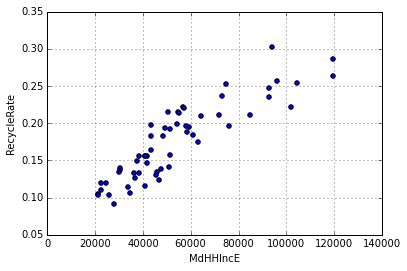

In [149]:
df.plot(kind="scatter", x="MdHHIncE", y="RecycleRate")

In [150]:
data = np.asarray(df[["RecycleRate", "MdHHIncE"]])
x = data[:, 1:]
y = data[:, 0]

In [151]:
df.head()

,CD_Name,MdHHIncE,RecycleRate
0,"Battery Park City, Greenwich Village & Soho",119596,0.286771
1,"Battery Park City, Greenwich Village & Soho",119596,0.264074
2,Chinatown & Lower East Side,40919,0.156485
3,"Chelsea, Clinton & Midtown Business Distric",92583,0.235125
4,"Chelsea, Clinton & Midtown Business Distric",92583,0.246725


In [152]:
lr = LinearRegression()
type(lr)
lr.fit(x,y)
m = lr.coef_[0]
b = lr.intercept_

In [153]:
print m
print b

1.86961266766e-06
0.0748041361524


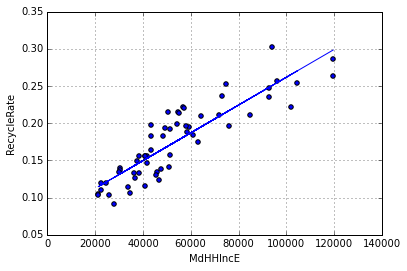

In [154]:
df.plot(kind="scatter",x="MdHHIncE",y="RecycleRate")
plt.plot(df['MdHHIncE'],m*df['MdHHIncE']+b,'-')

In [155]:
lr.score(x,y)

0.78284128053935953

#2. What is the relationship between these two variables? Write a short Tumblr post outlining the relationship based on your findings

The two variables seem to have a quiet strong correlation. The coefficient of correlation is 0.884783, the coefficient of determination is 0.78.

# 3. Based on the outputs from Exercise 1, create a function that takes in a median income and outputs an estimated recycling rate.  

In [156]:
def pred_recycling(income):
    return (m*income) + b

In [157]:
pred_recycling(22000)

0.11593561484097537

In [158]:
lr.predict(22000)

array([ 0.11593561])

# 4. Using the height_weight_gender.csv data from class, filter the data by gender and create models for each gender (male and female). Write a function that takes in a person’s height and gender and outputs an estimated weight with appropriate error estimation. 

In [159]:
df2 = pd.read_csv("data/heights_weights_genders.csv")

In [160]:
df_male = df2[df2.Gender == "Male"]
df_female = df2[df2.Gender == "Female"]

In [161]:
df_male.corr()

,Height,Weight
Height,1.000000,0.862979
Weight,0.862979,1.000000


In [162]:
df_female.corr()

,Height,Weight
Height,1.000000,0.849609
Weight,0.849609,1.000000


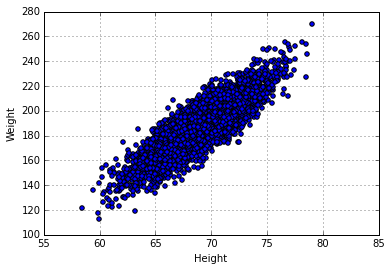

In [163]:
df_male.plot(kind="scatter", x="Height", y="Weight")

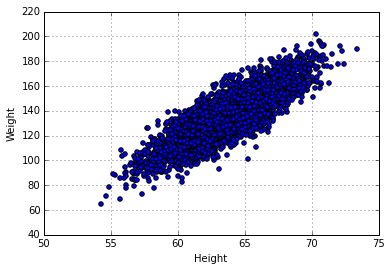

In [171]:
df_female.plot(kind="scatter", x="Height", y="Weight")

5.96177381203
-224.498840705


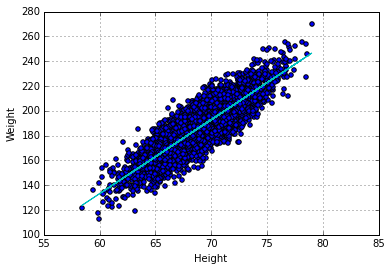

In [187]:
data_male = np.asarray(df_male[['Weight',"Height"]])
x = data_male[:, 1:]
y = data_male[:, 0]
lr = LinearRegression()
type(lr)
lr.fit(x,y)
m_male = lr.coef_[0]
b_male = lr.intercept_
df_male.plot(kind="scatter",x="Height",y="Weight")
plt.plot(df_male['Height'],m_male*df_male['Height']+b_male,'c')
print m_male
print b_male

In [176]:
lr.score(x,y)

0.74473249315914503

5.99404661485
-246.013265747


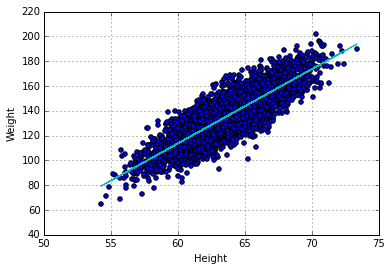

In [186]:
data_female = np.asarray(df_female[['Weight',"Height"]])
x = data_female[:, 1:]
y = data_female[:, 0]
lr = LinearRegression()
type(lr)
lr.fit(x,y)
m_female = lr.coef_[0]
b_female = lr.intercept_
df_female.plot(kind="scatter",x="Height",y="Weight")
plt.plot(df_female['Height'],m_female*df_female['Height']+b_female,'c')
print m_female
print b_female

In [168]:
lr.score(x,y)

0.72183475861229918

In [182]:
def pred_weight(height, gender):
    if gender == "male":
        return (m_male*height) + (b_male) 
    if gender == "female":
        return (m_female*height) + (b_female) 

In [183]:
pred_weight(67, "female")

155.58785744857809

# 5. Using data from the FiveThirtyEight post http://53eig.ht/1e2aV6U, write code to calculate the correlation of the responses from the poll.

In [206]:
df = pd.read_csv('538.csv', index_col=0)
df

,Dem,Rep,Ind,Men,Women,White,Black,Degree,Non Degree,under 35,35-54,55+,65+,under $50k,$50k+,Lib,Cons,Party
Obama Approve,0.78,0.10,0.37,0.41,0.47,0.35,0.86,0.47,0.43,0.56,0.35,0.45,0.43,0.48,0.42,0.69,0.24,0.15
Iran Favor,0.60,0.34,0.44,0.46,0.47,0.45,0.54,0.50,0.45,0.51,0.46,0.45,0.41,0.47,0.48,0.61,0.35,0.35


In [207]:
df = df[[u'Dem', u'Rep', u'Ind', u'Men', u'Women', u'White', u'Black', u'Degree', u'under 35', u'35-54', u'55+', u'65+', u'under $50k', u'$50k+', u'Lib', u'Cons', u'Party']]

In [208]:
df = df.transpose()

In [209]:
df.corr()

,Obama Approve,Iran Favor
Obama Approve,1.000000,0.911276
Iran Favor,0.911276,1.000000


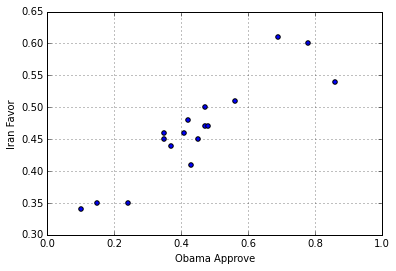

In [210]:
df.plot(kind="scatter", x="Obama Approve", y="Iran Favor")

In [237]:
data = np.asarray(df[["Iran Favor","Obama Approve"]])
x = data[:, 1:]
y = data[:, 0]

In [238]:
lr = LinearRegression()
type(lr)
lr.fit(x,y)
m = lr.coef_[0]
b = lr.intercept_

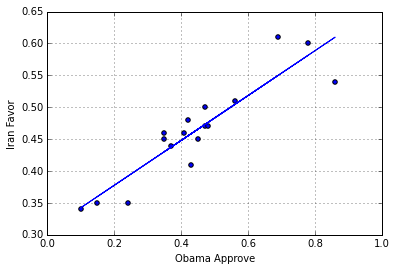

In [239]:
df.plot(kind="scatter",x="Obama Approve", y="Iran Favor")
plt.plot(df['Obama Approve'],m*df['Obama Approve']+b,'-')

In [236]:
lr.score(x,y)

0.83042446788436897

# 5. Write a short Tumblr post describing the results of your analysis

The analysis confirmed that there is a very strong correlation between Iran Favor and Obama Approve. The R-squared is 0.83, which is pretty high.